In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
police_df = pd.read_csv('/content/Raleigh_Police_Incidents_(NIBRS).csv')
police_df.head()

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
0,NaN,NaN,12001,9cdee08d-11c8-4789-864b-6965a1b2e620,NaN,MISCELLANEOUS,81H,Miscellaneous/Missing Person (18 & over),NaN,NaN,NaN,RALEIGH,Northeast,2017/01/15 03:28:00+00,2017,1,14,22,Saturday,0.0,0.0,RPD,2017/01/19 20:11:28.950+00
1,NaN,NaN,12002,6f6731f4-dd64-44c7-895c-555de2703c8a,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,North,2017/07/29 12:35:00+00,2017,7,29,8,Saturday,0.0,0.0,RPD,2017/08/01 14:06:50.553+00
2,NaN,NaN,12003,f0fd0e92-448e-4ca8-86c9-e6594564318b,NaN,MISCELLANEOUS,81F,Miscellaneous/Mental Commitment,NaN,NaN,NaN,RALEIGH,Southwest,2016/03/07 03:52:00+00,2016,3,6,22,Sunday,0.0,0.0,RPD,2016/04/14 14:43:38.923+00
3,NaN,NaN,12004,8a212e84-7b53-478a-b225-c212aa25d7fd,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,Southeast,2015/03/24 04:59:00+00,2015,3,24,0,Tuesday,0.0,0.0,RPD,2015/03/25 19:24:28.430+00
4,NaN,NaN,12005,01614b98-48f5-4374-a561-17c4b29d8857,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,RALEIGH,Southeast,2015/12/23 00:57:00+00,2015,12,22,19,Tuesday,0.0,0.0,RPD,2016/01/13 19:29:51.767+00


In [ ]:
def draw_missing_data_table(df):
    ''' Returns a table of % missing from each feature column in the input dataframe'''
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent Missing'])
    final_missing = missing_data.reset_index().rename(columns = 
                                                      {'index': 'feature', 
                                                       'Total': 'total null', 
                                                       'Percent Missing': '% of null values in the column'})
    return final_missing

draw_missing_data_table(police_df)

,feature,total null,% of null values in the column
0,crime_type,140017,0.414521
1,X,86244,0.255326
2,Y,86244,0.255326
3,reported_block_address,84076,0.248908
4,city_of_incident,84046,0.248819
5,case_number,84045,0.248816
6,city,2,0.000006
7,reported_month,0,0.000000
8,reported_year,0,0.000000
9,reported_date,0,0.000000


In [18]:
police_df['crime_type'].unique()

array([nan, 'CRIMES AGAINST PERSONS', 'CRIMES AGAINST PROPERTY',
       'CRIMES AGAINST SOCIETY'], dtype=object)

With lots of *crime_type missing* we will **drop** the feature



In [22]:
police_df[police_df.city.isna()]

,X,Y,OBJECTID,GlobalID,case_number,crime_category,crime_code,crime_description,crime_type,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
194181,NaN,NaN,460109,2c37be5c-68ef-46a0-a9c7-3ddd61de450f,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,NaN,UNK,2019/01/19 00:35:00+00,2019,1,18,19,Friday,0.0,0.0,RPD,2019/12/18 14:34:49.920+00
326946,NaN,NaN,608193,36487dc9-2ceb-4026-8529-54bcd201fb0f,NaN,MISCELLANEOUS,81A,Miscellaneous/All Other Non-Offenses,NaN,NaN,NaN,NaN,Southwest,2020/12/24 06:17:00+00,2020,12,24,1,Thursday,0.0,0.0,RPD,2021/01/13 05:34:28.510+00


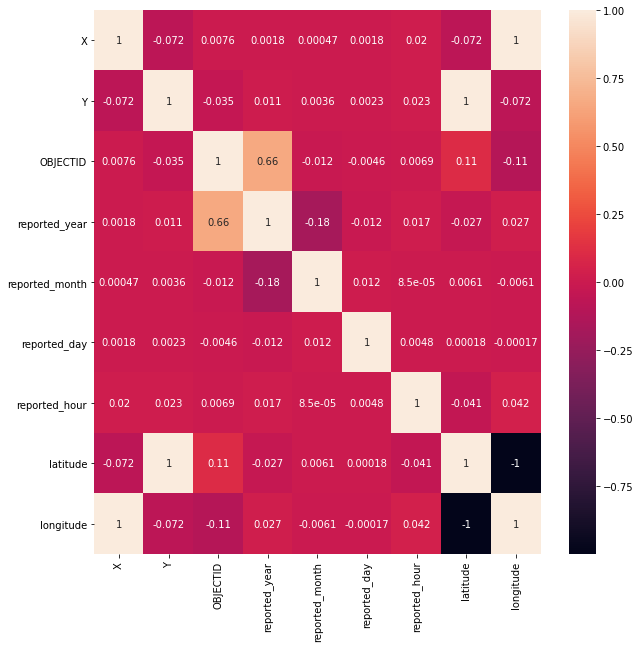

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(police_df.corr(), annot = True)

In [4]:
police_df['city'].unique()

array(['RALEIGH', 'GARNER', 'WAKE FOREST', 'Raleigh',
       'Miscellaneous/Missing Person (16-over)', 'raleigh', 'Garner',
       'MORRISVILLE', 'Cary', 'MAITLAND', 'APEX', 'wake forest', 'garner',
       'FUQUAY VARINA', 'HOLLY SPRINGS', 'KNIGHTDALE', 'CARY',
       'Fuquay Varina', 'ZEBULON', 'WENDELL', 'Wilmington', 'COLUMBIA',
       'MELBOURNE', 'SALEMBURG', 'BENTON HARBOR, MI', 'GOSHEN', nan,
       'Knightdale', 'Wendell', 'Rolesville', 'Wake Forest', 'Durham',
       'cary', 'Youngsville', 'Morrisville', 'durham', 'Holly Springs',
       '`', 'Zebulon', 'Clayton', 'SPARTA'], dtype=object)

In [7]:
police_df['city_of_incident'].unique()

array([nan, 'RALEIGH', 'WAKE COUNTY', 'HOLLY SPRINGS', 'APEX',
       'WAKE FOREST', 'FUQUAY-VARINA', 'CARY', 'MORRISVILLE', 'GARNER',
       'KNIGHTDALE', 'ZEBULON', 'ROLESVILLE', 'DURHAM', 'WENDELL'],
      dtype=object)

In [5]:
police_df['agency'].unique()

array(['RPD'], dtype=object)

In [6]:
police_df['district'].unique()

array(['Northeast', 'North', 'Southwest', 'Southeast', 'Northwest',
       'Downtown', 'UNK'], dtype=object)

In [20]:
police_df['crime_category'].value_counts().sum()

337780

In [ ]:
police_df.info()

In [14]:
police_df.shape[0]

337780

In [13]:
police_df.groupby(['crime_category']).count().sort_values('reported_block_address', ascending = False)

,X,Y,OBJECTID,GlobalID,case_number,crime_code,crime_description,crime_type,reported_block_address,city_of_incident,city,district,reported_date,reported_year,reported_month,reported_day,reported_hour,reported_dayofwk,latitude,longitude,agency,updated_date
crime_category,,,,,,,,,,,,,,,,,,,,,,
ASSAULT,39473,39473,41441,41441,39803,41441,41441,41441,39800,39803,41441,41441,41441,41441,41441,41441,41441,41441,41441,41441,41441,41441
LARCENY,34816,34816,34961,34961,34961,34961,34961,34959,34959,34961,34961,34961,34961,34961,34961,34961,34961,34961,34961,34961,34961,34961
DRUGS,25243,25243,25555,25555,25555,25555,25555,25555,25550,25554,25555,25555,25555,25555,25555,25555,25555,25555,25555,25555,25555,25555
VANDALISM,21764,21764,21959,21959,21959,21959,21959,4187,21957,21959,21959,21959,21959,21959,21959,21959,21959,21959,21959,21959,21959,21959
LARCENY FROM MV,21138,21138,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258,21258
FRAUD,20866,20866,20999,20999,20999,20999,20999,20031,20999,20999,20999,20999,20999,20999,20999,20999,20999,20999,20999,20999,20999,20999
ALL OTHER OFFENSES,15128,15128,15892,15892,15300,15892,15892,0,15299,15300,15892,15892,15892,15892,15892,15892,15892,15892,15892,15892,15892,15892
DRUG VIOLATIONS,12199,12199,12358,12358,12358,12358,12358,12357,12354,12358,12358,12358,12358,12358,12358,12358,12358,12358,12358,12358,12358,12358
BURGLARY/RESIDENTIAL,10198,10198,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255,10255
